#### Домашнее задание «Функции потерь и оптимизация»

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
#from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
irises = datasets.load_iris()

названия ирисов

In [3]:
print(irises.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
X = []
Y = []
#X_origin

#Можно преобразовать в df
# data = pd.DataFrame(irises.data, columns=irises.feature_names)
# data['target'] = pd.DataFrame(irises.target)
# data_filtered = data.loc[data.target != 0]

# убираем setosa
for _ in range(len(irises.target)):
    if irises.target[_] == 1:
        X.append(irises.data[_])
        Y.append(0)
    if irises.target[_] == 2:
        X.append(irises.data[_])
        Y.append(1)

X = np.asarray(X)
Y = np.asarray(Y)

print(len(irises.target)) #полный сет target
print(len(Y))             #новый

150
100


Строим регрессию
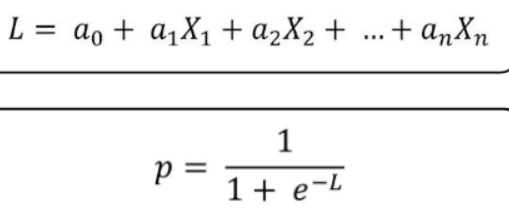

In [5]:

def L_(a_l, X):
    return a_l[0] + a_l[1] * X[:, 0] + a_l[2] * X[:, 1] + a_l[3] * X[:, 2] + a_l[4] * X[:, 3]


def sigmoid(L_):
    return 1./(1 + np.exp(-L_))

In [24]:
# предсказание
def predict(a_p, X):
    return sigmoid(L_(a_p, X))

# BCEntropy
def cost(Y, predict_val):
    return - np.mean(np.log(predict_val) * Y + np.log(1 - predict_val) * (1 - Y))



# метрика
def errors(X, Y, a_e):
    incorrect = 0
    correct = 0
    for _, value in enumerate(np.around(predict(a_e, X))):
        if  Y[_].item() != round(value):
            incorrect += 1
        else:
            correct += 1
    return correct,incorrect

# градиент
def predict_grad(X, Y, a_g):
    costs.clear()
    for _ in range(epochs):
        predict_val = predict(a_g, X)
        cost_ = cost(Y, predict_val)
        costs.append(cost_)
        a_g[0] = a_g[0] - lr * np.sum(predict_val - Y) / len(predict_val)
        for j in range(4):
          a_g[j+1] = a_g[j+1] - lr * np.sum((predict_val - Y) * X[:, j])/len(predict_val)
    # возвращаем итоговые коэффициенты theta
    return a_g




In [25]:
# картинку рисуем
def picture(name):
    plt.figure(figsize=(10, 6))
    plt.plot(costs)
    name = "График сходимости методом "+name
    plt.title(name)
    plt.xlabel("Итерации")
    plt.ylabel("Потери")
    plt.show()
    return

запускаем

In [26]:
%%time
#случайный выбор весов для тестирования
a_ = np.random.normal(size=(5,))
costs = []
epochs = 50000
lr = 0.01
a_ = predict_grad(X, Y, a_)
print("Базовые коэффициенты", a_,"\nОшибки метода (правильно,неправильно)",errors(X,Y,a_),"шт\nПотери",costs[0],"...",costs[len(costs)-1])



Базовые коэффициенты [-2.96392859 -3.62009727 -3.94606107  5.27271662  6.63535174] 
Ошибки метода (правильно,неправильно) (97, 3) шт
Потери 1.4968366477297195 ... 0.1071468766057479
CPU times: user 4.65 s, sys: 306 ms, total: 4.96 s
Wall time: 4.78 s


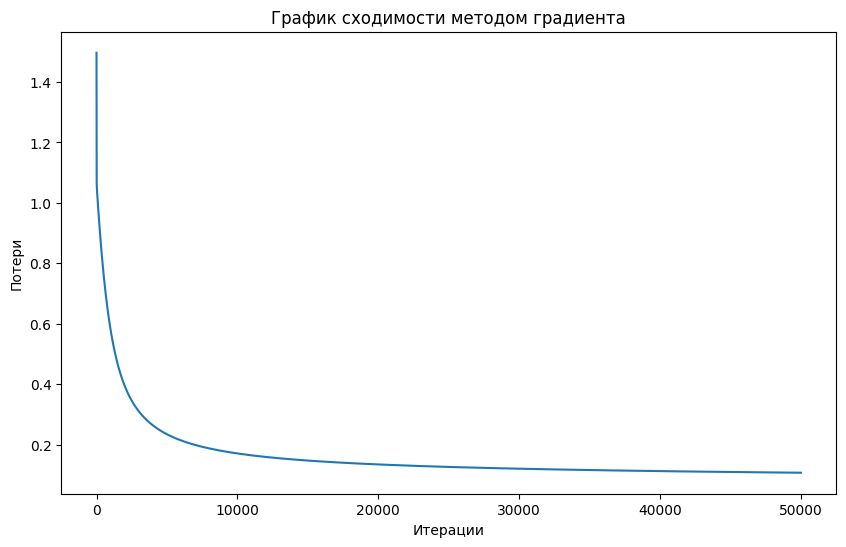

In [27]:
# график
picture('градиента')

###RMSPop

RMSProp взял отсюда
https://proproprogs.ru/ml/ml-optimizatory-gradientnyh-algoritmov-rmsprop-adadelta-adam-nadam

In [28]:
def predict_rmsprop(X, Y, eps, alpha, a_rms):
    costs.clear()
    gr = np.zeros(5)
    s_q_gr = np.zeros(5)
    for _ in range(epochs):
        predict_val = predict(a_rms, X)
        cost_ = cost(Y, predict_val)
        costs.append(cost_)
        gr[0] = np.sum(predict_val - Y)/len(predict_val)
        for j in range(4):
          gr[j+1] = np.sum((predict_val - Y) * X[:, j])/len(predict_val)
        s_q_gr = alpha * s_q_gr + (1 - alpha)  * gr ** 2
        a_rms -= lr * gr / np.sqrt(s_q_gr + eps)
    return a_rms

In [29]:
%%time
a_ = np.random.normal(size=(5,))
a_ = predict_rmsprop(X, Y, 0.9, 0.000001, a_)
print("Базовые коэффициенты", a_,"\nОшибки метода (правильно,неправильно)",errors(X,Y,a_),"шт\nПотери","...",costs[0],costs[len(costs)-1])


Базовые коэффициенты [-3.60983907 -3.57046495 -3.9801046   5.30891539  6.78194563] 
Ошибки метода (правильно,неправильно) (97, 3) шт
Потери ... 0.9956820314812621 0.10384286852083974
CPU times: user 5.05 s, sys: 224 ms, total: 5.27 s
Wall time: 5.18 s


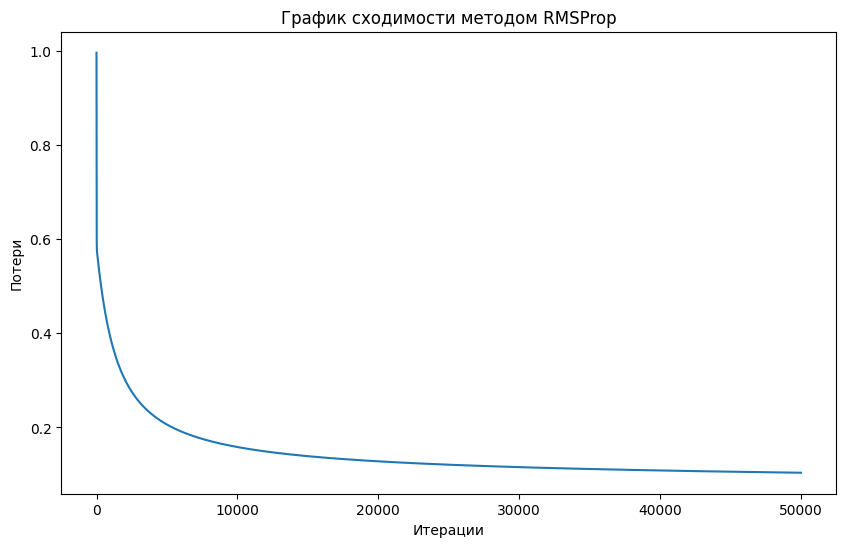

In [30]:
# график
picture('RMSProp')

### Nesterov Accelerated Gradient
https://habr.com/ru/articles/318970/

In [31]:
def predict_nag(X, Y, gamma, a_nag):
    vt_prev = np.zeros(5)
    vt = np.zeros(5)
    costs.clear()
    for _ in range(epochs):
        predict_val = predict(a_nag, X)
        cost_ = cost(Y, predict_val)
        costs.append(cost_)
        predict_val = predict(a_nag - gamma * vt_prev, X)
        vt[0] = (gamma * vt_prev[0] + lr * np.sum(predict_val - Y))/len(predict_val)
        for j in range(4):
          vt[j+1] = (gamma * vt_prev[j+1] + lr * np.sum((predict_val - Y) * X[:, j]))/len(predict_val)
        a_nag -= vt
        vt_prev = vt
    return a_nag

In [32]:
%%time
a_ = np.random.normal(size=(5,))
predict_nag(X, Y, 0.9, a_)
print("Базовые коэффициенты", a_,"\nОшибки метода (правильно,неправильно)",errors(X,Y,a_),"шт\nПотери","...",costs[0],costs[len(costs)-1])


Базовые коэффициенты [-4.15599523 -3.65175563 -3.5578452   5.45048869  6.26026957] 
Ошибки метода (правильно,неправильно) (97, 3) шт
Потери ... 1.2980059895979992 0.10403916927666514
CPU times: user 5.7 s, sys: 131 ms, total: 5.83 s
Wall time: 5.94 s


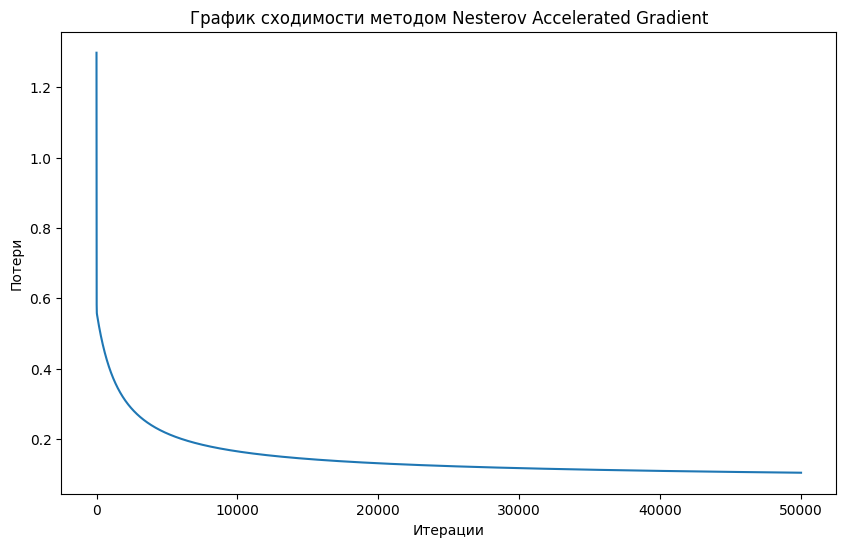

In [33]:
# график
picture('Nesterov Accelerated Gradient')



*   Метод------| Ошибки  | Время работы   
*   Градиент-|---97/3-----| 4.78s    
*   RMSPop---|---97/3-----| 5.18s
*   NAG---------         |---97/3-----| 5.94s



Из вышеизложенного видно, что методы дают схожие результаты, весьма зависящие от вводных (стартовых весов и коэффициентов для RMSPop и метода Нестерова).